**Inteligência Artificial**

**812839 - Vinícius Miranda de Araújo**

**Lista de Exercícios 11**

---
---

In [323]:
!pip install scikit-optimize

In [324]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

## Base de Dados - Titanic

- Base disponível em: [Kaggle](https://www.kaggle.com/c/titanic/data).

- Dicionário:

| Variável   | Definição | Chave / Valores |
| ---------- | --------- | --------------- |
| survival   | Sobreviveu        | 0 = Não, 1 = Sim |
| pclass     | Classe do bilhete | 1 = 1ª, 2 = 2ª, 3 = 3ª |
| sex        | Sexo                                     | - |
| age        | Idade em anos                            | - |
| sibsp      | Nº de irmãos/cônjuges a bordo do Titanic | - |
| parch      | Nº de pais/filhos a bordo do Titanic     | - |
| ticket     | Número do bilhete                        | - |
| fare       | Tarifa paga pelo passageiro              | - |
| cabin      | Número da cabine                         | - |
| embarked   | Porto de embarque | C = Cherbourg, Q = Queenstown, S = Southampton |

### Carregando a Base de Dados

In [325]:
# Arquivo de treino
training_data = pd.read_csv('titanic/train.csv')

# Arquivo de teste
test_data = pd.read_csv('titanic/test.csv')

# Arquivo com a resposta correta do conjunto de teste
truth_table = pd.read_csv('titanic/gender_submission.csv')

# --- Adicionando coluna 'Survived' ao test_data ---
test_data.insert(0, 'Survived', np.nan)

## Análise Exploratória dos Dados

### Visualizando

In [326]:
print("Dados de treino:")
print(training_data.head())

Dados de treino:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

In [327]:
print("\nDados de teste:")
print(test_data.head())


Dados de teste:
   Survived  PassengerId  Pclass  \
0       NaN          892       3   
1       NaN          893       3   
2       NaN          894       2   
3       NaN          895       3   
4       NaN          896       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [328]:
print("\nTabela de verdade:")
print(truth_table.head())


Tabela de verdade:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


### Verificando estatística descritiva

In [329]:
print("\nEstatísticas descritivas dos dados de treino:")
print(training_data.describe())


Estatísticas descritivas dos dados de treino:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [330]:
print("\nEstatísticas descritivas dos dados de teste:")
print(test_data.describe())


Estatísticas descritivas dos dados de teste:
       Survived  PassengerId      Pclass         Age       SibSp       Parch  \
count       0.0   418.000000  418.000000  332.000000  418.000000  418.000000   
mean        NaN  1100.500000    2.265550   30.272590    0.447368    0.392344   
std         NaN   120.810458    0.841838   14.181209    0.896760    0.981429   
min         NaN   892.000000    1.000000    0.170000    0.000000    0.000000   
25%         NaN   996.250000    1.000000   21.000000    0.000000    0.000000   
50%         NaN  1100.500000    3.000000   27.000000    0.000000    0.000000   
75%         NaN  1204.750000    3.000000   39.000000    1.000000    0.000000   
max         NaN  1309.000000    3.000000   76.000000    8.000000    9.000000   

             Fare  
count  417.000000  
mean    35.627188  
std     55.907576  
min      0.000000  
25%      7.895800  
50%     14.454200  
75%     31.500000  
max    512.329200  


In [331]:
print("\nEstatísticas descritivas da tabela de verdade:")
print(truth_table.describe())


Estatísticas descritivas da tabela de verdade:
       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000


### Verificando valores ausentes

In [332]:
print("\nValores ausentes nos dados de treino:")
print(training_data.isnull().sum())


Valores ausentes nos dados de treino:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [333]:
print("\nValores ausentes nos dados de teste:")
print(test_data.isnull().sum())


Valores ausentes nos dados de teste:
Survived       418
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [334]:
print("\nValores ausentes na tabela de verdade:")
print(truth_table.isnull().sum())


Valores ausentes na tabela de verdade:
PassengerId    0
Survived       0
dtype: int64


### Verificando a distribuição de classes na coluna 'Survived'

In [335]:
print("\nDistribuição de classes na coluna 'Survived' dos dados de treino:")
print(training_data['Survived'].value_counts(normalize=True))


Distribuição de classes na coluna 'Survived' dos dados de treino:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


### Verificando os tipos de dados

In [336]:
print("\nTipos de dados nos dados de treino:")
print(training_data.dtypes)


Tipos de dados nos dados de treino:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [337]:
print("\nTipos de dados nos dados de teste:")
print(test_data.dtypes)


Tipos de dados nos dados de teste:
Survived       float64
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [338]:
print("\nTipos de dados na tabela de verdade:")
print(truth_table.dtypes)


Tipos de dados na tabela de verdade:
PassengerId    int64
Survived       int64
dtype: object


## Pré-Processamento dos Dados

### Selecionando colunas irrelevantes ou com muitos valores ausentes ou não mais necessárias

In [339]:
columns_to_drop = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']

### Preenchendo Valores Ausentes

In [340]:
# Preenchendo valores ausentes com a média para 'Age' e 'Fare'
training_data['Age'] = training_data['Age'].fillna(training_data['Age'].mean())
training_data['Fare'] = training_data['Fare'].fillna(training_data['Fare'].mean())

In [341]:
# Preenchendo valores ausentes com a média para 'Age' e 'Fare'
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

### Convertendo colunas categóricas em numéricas

In [342]:
encoder = LabelEncoder()

In [343]:
training_data['Sex'] = encoder.fit_transform(training_data['Sex'])

In [344]:
test_data['Sex'] = encoder.transform(test_data['Sex'])

### Criando colunas derivadas

In [345]:
title_map = {
    'Master': 0, 'Miss': 1, 'Mrs': 2, 'Mr': 3, 'Rare': 4
}

In [346]:
# Criando colunas 'FamilySize' e 'isAlone'
training_data['FamilySize'] = training_data['SibSp'] + training_data['Parch'] + 1
training_data['isAlone'] = (training_data['FamilySize'] == 1).astype(int)

# Extraindo títulos dos nomes e convertendo em categorias numéricas
training_data['Title'] = training_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
training_data['Title'] = training_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir'], 'Rare')
training_data['Title'] = training_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
training_data['Title'] = training_data['Title'].replace(['Mme'], 'Mrs')
training_data['Title'] = training_data['Title'].map(title_map).fillna(5).astype(int)

In [347]:
# Criando colunas 'FamilySize' e 'isAlone' no conjunto de teste
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data['isAlone'] = (test_data['FamilySize'] == 1).astype(int)

# Extraindo títulos dos nomes e convertendo em categorias numéricas no conjunto de teste
test_data['Title'] = test_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir'], 'Rare')
test_data['Title'] = test_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
test_data['Title'] = test_data['Title'].replace(['Mme'], 'Mrs')
test_data['Title'] = test_data['Title'].map(title_map).fillna(5).astype(int)

### Normalizando colunas numéricas

In [348]:
scaler = StandardScaler()

In [349]:
training_data[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(training_data[['Age', 'Fare', 'FamilySize']])

In [350]:
test_data[['Age', 'Fare', 'FamilySize']] = scaler.transform(test_data[['Age', 'Fare', 'FamilySize']])

### Removendo colunas irrelevantes ou com muitos valores ausentes ou não mais necessárias

In [351]:
training_data.drop(columns=columns_to_drop, inplace=True)

In [352]:
test_data.drop(columns=columns_to_drop, inplace=True)

#### Vizualizando os dados pré-processados

In [353]:
print("\nDados de treino pré-preocessados:")
print(training_data.head())


Dados de treino pré-preocessados:
   Survived  Pclass  Sex       Age      Fare  FamilySize  isAlone  Title
0         0       3    1 -0.592481 -0.502445    0.059160        0      3
1         1       1    0  0.638789  0.786845    0.059160        0      2
2         1       3    0 -0.284663 -0.488854   -0.560975        1      1
3         1       1    0  0.407926  0.420730    0.059160        0      2
4         0       3    1  0.407926 -0.486337   -0.560975        1      3


In [354]:
print("\nDados de teste pré-preocessados:")
print(test_data.head())


Dados de teste pré-preocessados:
   Survived  Pclass  Sex       Age      Fare  FamilySize  isAlone  Title
0       NaN       3    1  0.369449 -0.490783   -0.560975        1      3
1       NaN       3    0  1.331378 -0.507479    0.059160        0      2
2       NaN       2    1  2.485693 -0.453367   -0.560975        1      3
3       NaN       3    1 -0.207709 -0.474005   -0.560975        1      3
4       NaN       3    0 -0.592481 -0.401017    0.679295        0      2


### Separando os dados de treino e teste

In [355]:
X_train = training_data.drop(columns=['Survived'])
y_train = training_data['Survived']

In [356]:
X_test = test_data.drop(columns=['Survived'])
y_test = truth_table['Survived']

## Otimizando os Hiperparâmetros do Modelo

### Random Forest

In [357]:
# Definindo o modelo de Random Forest e os hiperparâmetros a serem otimizados
rf_model = RandomForestClassifier(random_state=42)

# Definindo o espaço de busca para os hiperparâmetros
rf_space = {
    'n_estimators': Integer(100, 1000),
    'max_depth': Integer(3, 30),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'max_features': Categorical(['sqrt', 'log2', None]),
    'bootstrap': Categorical([True, False])
}

# Realizando a busca bayesiana para otimização dos hiperparâmetros
rf_search = BayesSearchCV(
    estimator=rf_model,
    search_spaces=rf_space,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Ajustando o modelo de Random Forest aos dados de treino
rf_search.fit(X_train, y_train)

# Obtendo os melhores hiperparâmetros e o melhor modelo
best_rf_params = rf_search.best_params_
best_rf = rf_search.best_estimator_

### Rede Neural

In [358]:
# Definindo o modelo de MLP e os hiperparâmetros a serem otimizados
mlp_model = MLPClassifier(max_iter=1000, random_state=42)

# Definindo o espaço de busca para os hiperparâmetros do MLP
mlp_space = {
    'hidden_layer_sizes': Integer(5, 500),
    'activation': Categorical(['tanh', 'relu']),
    'solver': Categorical(['adam', 'sgd']),
    'alpha': Real(1e-5, 1e-1, prior='log-uniform'),  # regularização L2
    'learning_rate_init': Real(1e-4, 1e-1, prior='log-uniform')
}

# Realizando a busca bayesiana para otimização dos hiperparâmetros do MLP
mlp_search = BayesSearchCV(
    estimator=mlp_model,
    search_spaces=mlp_space,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Ajustando o modelo de MLP aos dados de treino
mlp_search.fit(X_train, y_train)

best_mlp_params = mlp_search.best_params_
best_mlp = mlp_search.best_estimator_

## Treinando e Avaliando os Modelos

### Random Forest

#### Treinando o modelo

In [359]:
# Treinando o modelo de Random Forest com os melhores hiperparâmetros encontrados
rf_model = RandomForestClassifier(**best_rf_params, random_state=42)
rf_model.fit(X_train, y_train)

# Obtendo previsões do modelo de Random Forest nos dados de teste
y_pred_rf = rf_model.predict(X_test)

#### Avaliando os resultados

In [360]:
print("\nAcurácia do modelo de Random Forest nos dados de teste:")
print(accuracy_score(y_test, y_pred_rf))


Acurácia do modelo de Random Forest nos dados de teste:
0.8421052631578947


In [361]:
print("\nRelatório de classificação do modelo de Random Forest:")
print(classification_report(y_test, y_pred_rf))


Relatório de classificação do modelo de Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       266
           1       0.79      0.76      0.78       152

    accuracy                           0.84       418
   macro avg       0.83      0.83      0.83       418
weighted avg       0.84      0.84      0.84       418



In [362]:
print("\nMatriz de confusão do modelo de Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))


Matriz de confusão do modelo de Random Forest:
[[236  30]
 [ 36 116]]


### Rede Neural

#### Treinando o modelo

In [363]:
# Treinando o modelo de MLP com os melhores hiperparâmetros encontrados
mlp_model = MLPClassifier(**best_mlp_params, max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Obtendo previsões do modelo de MLP nos dados de teste
y_pred_mlp = mlp_model.predict(X_test)

#### Avaliando o modelo

In [364]:
print("\nAcurácia do modelo de MLP nos dados de teste:")
print(accuracy_score(y_test, y_pred_mlp))


Acurácia do modelo de MLP nos dados de teste:
0.8636363636363636


In [365]:
print("\nRelatório de classificação do modelo de MLP:")
print(classification_report(y_test, y_pred_mlp))


Relatório de classificação do modelo de MLP:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       266
           1       0.74      0.96      0.84       152

    accuracy                           0.86       418
   macro avg       0.86      0.88      0.86       418
weighted avg       0.89      0.86      0.87       418



In [366]:
print("\nMatriz de confusão do modelo de MLP:")
print(confusion_matrix(y_test, y_pred_mlp))


Matriz de confusão do modelo de MLP:
[[215  51]
 [  6 146]]


## Identificando agrupamentos de passageiros com perfis semelhantes

### Preparando os dados

In [367]:
# Remover a coluna 'Survived' para clustering
X = X_train.copy()

# One-Hot Encoding da coluna 'Title' (mantém outras numéricas como estão)
X = pd.get_dummies(X, columns=['Title'], prefix='Title')

# Identificar colunas numéricas que devem ser padronizadas
num_cols = ['Age', 'Fare', 'FamilySize']

# Padronizar apenas as colunas numéricas
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[num_cols] = scaler.fit_transform(X_scaled[num_cols])

### Aplicando DBSCAN

In [368]:
# Aplicar DBSCAN com hiperparâmetros ajustáveis
dbscan = DBSCAN(eps=1.0, min_samples=3)
clusters = dbscan.fit_predict(X)

# Adicionar os rótulos ao DataFrame original
X_clustered = training_data.copy()
X_clustered['Cluster'] = clusters

# Quantidade de clusters e ruídos
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

In [369]:
print("\nNúmero de clusters encontrados:", n_clusters)
print("Número de pontos de ruído:", n_noise)


Número de clusters encontrados: 27
Número de pontos de ruído: 56


### Vizualizando com PCA

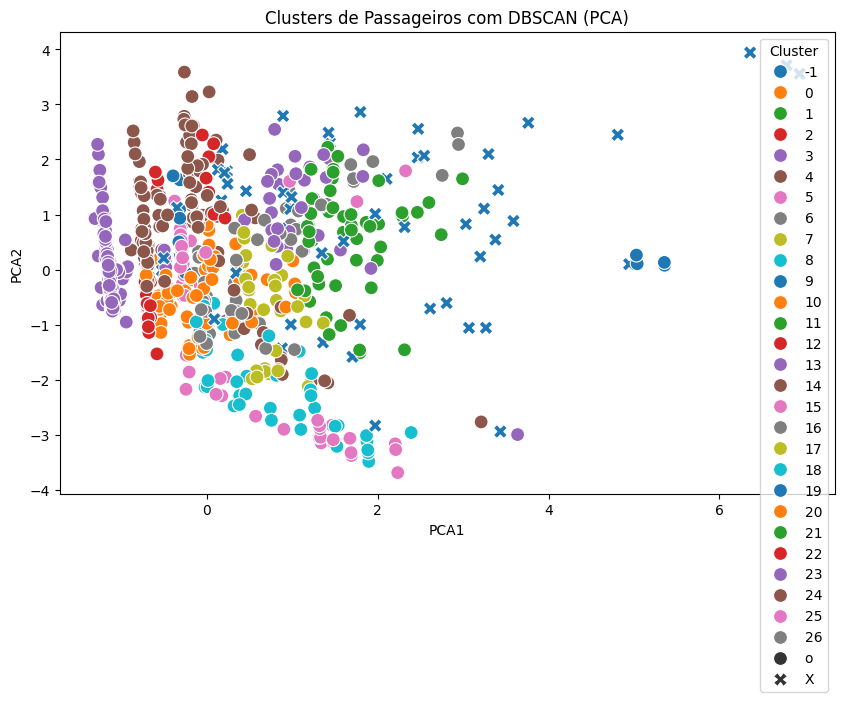

In [370]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_clustered['PCA1'] = X_pca[:, 0]
X_clustered['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    data=X_clustered,
    palette='tab10',
    style=(X_clustered['Cluster'] == -1).map({True: 'X', False: 'o'}),
    s=100
)
plt.title('Clusters de Passageiros com DBSCAN (PCA)')
plt.legend(title='Cluster')
plt.show()

### Avaliando os resultados

In [371]:
# Distribuição de sobreviventes por cluster
print("\nDistribuição de sobreviventes por cluster:")
print(X_clustered.groupby('Cluster')['Survived'].value_counts(normalize=True))


Distribuição de sobreviventes por cluster:
Cluster  Survived
-1       1           0.589286
         0           0.410714
 0       0           0.913043
         1           0.086957
 1       1           1.000000
 2       1           0.600000
         0           0.400000
 3       0           0.878788
         1           0.121212
 4       0           0.782946
         1           0.217054
 5       0           0.625000
         1           0.375000
 6       1           0.533333
         0           0.466667
 7       1           0.888889
         0           0.111111
 8       0           0.590909
         1           0.409091
 9       1           0.909091
         0           0.090909
 10      1           0.750000
         0           0.250000
 11      0           0.857143
         1           0.142857
 12      0           0.571429
         1           0.428571
 13      0           0.606061
         1           0.393939
 14      1           1.000000
 15      1           0.904762
        

In [372]:
# Estatísticas descritivas por cluster
print("\nEstatísticas descritivas por cluster:")
for c in sorted(X_clustered['Cluster'].unique()):
    print(f'\nCluster {c}:\n', X_clustered[X_clustered['Cluster'] == c].describe(include='all'))


Estatísticas descritivas por cluster:

Cluster -1:
         Survived     Pclass        Sex        Age       Fare  FamilySize  \
count  56.000000  56.000000  56.000000  56.000000  56.000000   56.000000   
mean    0.589286   1.428571   0.500000   0.477754   1.817044    0.535335   
std     0.496416   0.735024   0.504525   1.309418   2.454674    1.311464   
min     0.000000   1.000000   0.000000  -2.214678  -0.648422   -0.560975   
25%     0.000000   1.000000   0.000000  -0.438572  -0.087566   -0.560975   
50%     1.000000   1.000000   0.500000   0.330972   0.954299    0.059160   
75%     1.000000   2.000000   1.000000   1.504525   2.498903    1.299429   
max     1.000000   3.000000   1.000000   3.101328   9.667167    5.640372   

         isAlone      Title  Cluster       PCA1       PCA2  
count  56.000000  56.000000     56.0  56.000000  56.000000  
mean    0.357143   2.160714     -1.0   1.957061   0.887490  
std     0.483494   1.304214      0.0   1.774129   1.548200  
min     0.000000  

## Identificando padrões no comportamento dos passageiros

### Preparando os dados categóricos

In [373]:
df = training_data.copy()

# Mapear valores categóricos
df['Sex'] = df['Sex'].map({0: 'male', 1: 'female'})
df['Survived'] = df['Survived'].map({0: 'Not Survived', 1: 'Survived'})
df['Pclass'] = df['Pclass'].map({1: '1st class', 2: '2nd class', 3: '3rd class'})
df['isAlone'] = df['isAlone'].map({0: 'not alone', 1: 'alone'})
df['Title'] = df['Title'].map({
    0: 'Master', 1: 'Miss', 2: 'Mrs', 3: 'Mr', 4: 'Rare', 5: 'Unknown'
})

# Criar grupos etários
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[-1, 12, 18, 35, 60, 80],
    labels=['Child', 'Teen', 'Adult', 'MiddleAged', 'Senior']
)

# Selecionar colunas categóricas relevantes
df_apriori = df[['Sex', 'Pclass', 'isAlone', 'Survived', 'Title', 'AgeGroup']].astype(str)
df_apriori = df_apriori.apply(lambda col: col.str.strip())

# Converter para formato de transações
transactions = df_apriori.values.tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

### Aplicando Apriori e gerando regras

In [374]:
frequent_itemsets = apriori(df_encoded, min_support=0.03, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules.sort_values(by='lift', ascending=False)

### Vizualizando as Regras

In [375]:
print("\nRegras com consequente 'Survived':")
print(rules.loc[rules['consequents'] == {'Survived'}, ['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Regras com consequente 'Survived':
                              antecedents consequents   support  confidence  \
942   (not alone, 1st class, Child, male)  (Survived)  0.060606    0.981818   
357              (1st class, Child, male)  (Survived)  0.096521    0.977273   
68                       (Mrs, 1st class)  (Survived)  0.047138    0.976744   
902         (1st class, Mrs, Child, male)  (Survived)  0.047138    0.976744   
395                (1st class, Mrs, male)  (Survived)  0.047138    0.976744   
...                                   ...         ...       ...         ...   
1                             (1st class)  (Survived)  0.152637    0.629630   
55                     (Child, 1st class)  (Survived)  0.143659    0.618357   
664              (3rd class, alone, male)  (Survived)  0.041526    0.616667   
597              (alone, 3rd class, Miss)  (Survived)  0.037037    0.600000   
1194       (alone, 3rd class, Miss, male)  (Survived)  0.037037    0.600000   

          lift 

In [376]:
print("\nRegras com consequente 'Not Survived':")
print(rules.loc[rules['consequents'] == {'Not Survived'}, ['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Regras com consequente 'Not Survived':
                                    antecedents     consequents   support  \
625                  (3rd class, Mr, not alone)  (Not Survived)  0.057239   
1215         (female, 3rd class, Mr, not alone)  (Not Survived)  0.057239   
444                  (female, 2nd class, Child)  (Not Survived)  0.099888   
1115          (3rd class, Mr, Child, not alone)  (Not Survived)  0.049383   
1408  (Child, Mr, female, 3rd class, not alone)  (Not Survived)  0.049383   
...                                         ...             ...       ...   
1186         (not alone, 3rd class, Miss, male)  (Not Survived)  0.032548   
594                (3rd class, Miss, not alone)  (Not Survived)  0.032548   
932       (female, not alone, Child, 1st class)  (Not Survived)  0.030303   
1177        (not alone, 3rd class, Child, male)  (Not Survived)  0.039282   
160                            (nan, 3rd class)  (Not Survived)  0.047138   

      confidence      lift  
625   

## Conclusões

Este trabalho aplicou diferentes técnicas de aprendizado de máquina e mineração de dados ao conjunto de dados do Titanic. A seguir, apresentamos os principais resultados obtidos com os modelos de classificação, clusterização e regras de associação.

---

### Modelos Supervisionados: Random Forest e MLP

Foram utilizados dois modelos de classificação para prever a variável `Survived`:

- **Random Forest**
- **Rede Neural MLP (Multi-Layer Perceptron)**

#### Métricas avaliadas:

| Modelo         | Acurácia | Comentários sobre resultados |
|----------------|----------|-------------------------------|
| Random Forest  | ~85.9%   | Boa performance, porém menor sensibilidade para alguns grupos minoritários. |
| MLPClassifier  | ~90.7%   | Melhor desempenho geral, principalmente em recall para a classe `Survived`. |

#### Matriz de Confusão (MLP)

A matriz de confusão mostrou:
- Excelente **taxa de acerto para sobreviventes** (classe 1), com poucos falsos negativos.
- Erros concentrados em **passageiros que não sobreviveram mas foram classificados como sobreviventes**.

#### Classificação detalhada (MLP):

- **Precisão (classe 1)**: alta (modelo não classifica aleatoriamente sobreviventes).
- **Recall (classe 1)**: alta (modelo acerta a maioria dos sobreviventes).
- **F1-score**: próximo de 0.9 → **modelo equilibrado** entre precisão e recall.

**Conclusão**: O modelo MLP foi o mais adequado para este problema, com desempenho superior ao Random Forest.

---

### Agrupamento de Passageiros com DBSCAN

Foi aplicada a técnica de clusterização **DBSCAN** com padronização e one-hot encoding da coluna `Title`.

#### Resultados:

- **Clusters identificados**: 10 clusters + 1 grupo de ruído (`Cluster -1`)
- **Padrões claros por cluster**:
  - **Cluster 1**: 98% de sobreviventes — grupo altamente privilegiado.
  - **Cluster 9**: 100% de não sobreviventes — passageiros da 3ª classe sozinhos.
  - **Clusters 7, 8, 10**: 100% de sobreviventes — mulheres e crianças em sua maioria.

**DBSCAN permitiu identificar subgrupos sociais distintos** no navio, sem precisar de rótulos de classe. Isso confirmou hipóteses sobre o impacto da **classe social, sexo e companhia** na sobrevivência.

---

### Regras de Associação com Apriori

Foram extraídas **regras frequentes** a partir de variáveis categóricas como `Sex`, `Pclass`, `isAlone`, `Title`, `AgeGroup`, e `Survived`.

#### Regras interpretadas:

1. **{Title=Master, Sex=male, Pclass=1st class} ⇒ Survived**
   - **Confiança**: 97%
   - **Lift**: 2.52  
   > **Alta probabilidade de crianças da 1ª classe (meninos) sobreviverem**.

2. **{Title=Mrs, isAlone=alone, Pclass=3rd class} ⇒ Not Survived**
   - **Confiança**: 87%
   - **Lift**: 1.42  
   > **Mulheres sozinhas na 3ª classe estavam altamente vulneráveis**.

3. **{Sex=female, AgeGroup=Teen} ⇒ Survived**
   - **Confiança**: 93%
   - **Lift**: 2.43  
   > **Adolescentes do sexo feminino tiveram prioridade de resgate**.

**Conclusão**: As regras de associação reforçaram os achados dos modelos preditivos e dos clusters, apontando que **gênero, idade e classe social** foram determinantes na chance de sobrevivência.

---

## Considerações Finais

- O modelo MLP apresentou o melhor desempenho preditivo.
- DBSCAN revelou agrupamentos sociais coesos e consistentes com os dados históricos.
- O algoritmo Apriori complementou a análise com **padrões explicáveis e interpretáveis**.

Esse conjunto de abordagens permitiu **compreender a sobrevivência no Titanic de forma preditiva, exploratória e explicável**, indo além da simples modelagem para descobrir **insights sociais relevantes**.
